<a href="https://colab.research.google.com/github/Tepuy-A/Tesis-2/blob/main/Retomar_LinReg_con_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generar Datos


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

##Creación de Estados

In [ ]:
L=40

states=np.random.choice([-1, 1], size=(100000,L))

print(states)
print(np.shape(states))

[[ 1  1  1 ...  1  1  1]
 [-1 -1  1 ... -1 -1 -1]
 [ 1 -1  1 ... -1 -1 -1]
 ...
 [-1 -1  1 ... -1 -1 -1]
 [ 1 -1 -1 ...  1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]
(100000, 40)


## Cálculo de Energías

In [ ]:
def ising_energies(states):
    """
    This function calculates the energies of the states in the nn Ising Hamiltonian
    """
    L = states.shape[1]

    J = np.zeros((L, L),)

    for i in range(L):
        J[i,(i+1)%L]=-1.0 # interaction between nearest-neighbors



    # compute energies
    E = np.einsum('...i,ij,...j->...',states,J,states)

    return E
# calculate Ising energies

energies=ising_energies(states)

print(energies)
print(np.shape(energies))
print(max(energies))
print(min(energies))

[-4. -4. -4. ... -8.  4. -4.]
(100000,)
28.0
-32.0


## Reescribo los estados como un arreglo de interacciones spin-spin

In [ ]:
# reshape Ising states into RL samples: S_iS_j --> X_p
states=np.einsum('...i,...j->...ij', states, states)   #ahora states tiene forma  (10000, 40, 40)

shape=states.shape   #shape es (10000, 40, 40)

states=states.reshape((shape[0],shape[1]*shape[2]))  #ahora states tiene forma  (10000, 1600)  1600=40x40

print(states)
print(np.shape(states))

[[ 1  1  1 ...  1  1  1]
 [ 1  1 -1 ...  1  1  1]
 [ 1 -1  1 ...  1  1  1]
 ...
 [ 1  1 -1 ...  1  1  1]
 [ 1 -1 -1 ... -1  1  1]
 [ 1  1  1 ...  1  1  1]]
(100000, 1600)


## Uno los ejemplos con sus respectivas energias en un solo arreglo

Acá los "ejemplos" corresponden al arreglo de interacciones spin-spin almacenado en "states"

In [ ]:
# verifico que ambos arreglos tengan la misma cantidad de filas (10000)
assert states.shape[0] == energies.shape[0]


# Usamos la función hstack de NumPy para unir los arreglos horizontalmente
combined_array = np.hstack((states, energies.reshape(-1, 1)))

print(np.shape(combined_array))

# Genera los nombres de las columnas p1, p2, p3, ..., p40
column_names = ["p" + str(i) for i in range(1, 1601)]
column_names.append("Energy")  # Agrega la columna "Energy"

dataset = pd.DataFrame(combined_array, columns=column_names)

dataset

(100000, 1601)


,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p1592,p1593,p1594,p1595,p1596,p1597,p1598,p1599,p1600,Energy
0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,...,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-4.0
1,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-4.0
2,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-4.0
3,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-8.0
4,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,...,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,0.0
99996,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,4.0
99997,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-8.0
99998,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,4.0


## Importo TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.15.0


#### Dividir el conjunto de datos en conjunto de entrenamiento y prueba

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)


## define number of samples
n_samples=400
## define train and test data sets
#X_train=Data[0][:n_samples]
#Y_train=Data[1][:n_samples] #+ np.random.normal(0,4.0,size=X_train.shape[0])
#X_test=Data[0][n_samples:3*n_samples//2]
#Y_test=Data[1][n_samples:3*n_samples//2] #+ np.random.normal(0,4.0,size=X_test.shape[0])


#train_dataset = dataset[:n_samples]
#test_dataset = dataset[n_samples:3*n_samples//2]

#### Separa las etiquetas de los estados

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Energy')
test_labels = test_features.pop('Energy')

train_features


,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p1591,p1592,p1593,p1594,p1595,p1596,p1597,p1598,p1599,p1600
3582,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
60498,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0
53227,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0
21333,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0
3885,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27389,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0
8871,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0
47812,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,...,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
4539,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,...,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0


# Implemento la Red Neuronal

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(1600,)))  # Capa de entrada con LxL nodos
#model.add(layers.Dense(1, activation='sigmoid'))  # Capa oculta con 1 nodos y activación lineal
#model.add(layers.Dense(1600, activation='sigmoid'))  # Capa oculta con 1 nodos y activación lineal
model.add(layers.Dense(1, activation = 'linear' , use_bias = False ,kernel_regularizer=tf.keras.regularizers.l1(0.01)))  # Capa de salida sin sesgo para la matriz J

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

In [ ]:
history = model.fit(
    train_features,
    train_labels,
    epochs=30,
    batch_size=60,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.3)

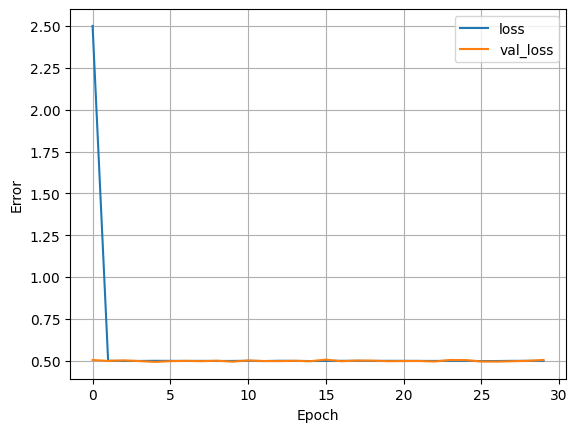

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)


plot_loss(history)

(1600, 1)


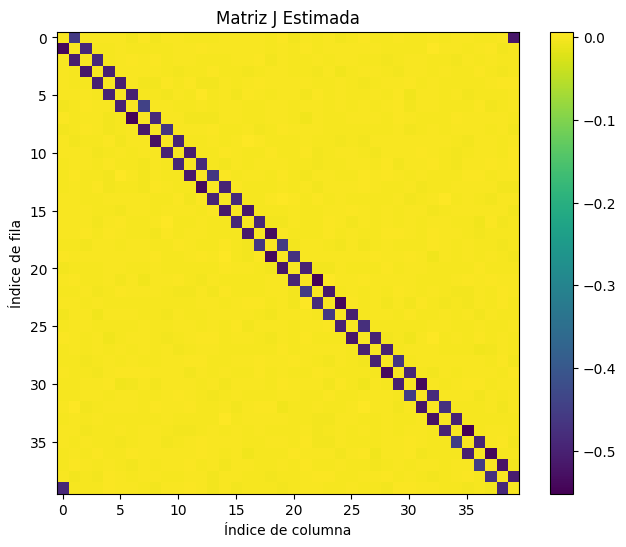

In [ ]:
# Obtener la matriz J estimada
estimated_J = model.layers[0].get_weights()[0]

print(np.shape(estimated_J))

### plot Ising interaction J
J_NN=np.array(estimated_J).reshape((40,40))

# Crear la figura y el gráfico de mapa de color
plt.figure(figsize=(8, 6))
plt.imshow(J_NN, cmap='viridis', interpolation='none')
plt.colorbar()
plt.title('Matriz J Estimada')
plt.xlabel('Índice de columna')
plt.ylabel('Índice de fila')
plt.show()